##### 导入包

In [3]:
import xgboost as xgb
import pandas as pd
import numpy as np
import warnings
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

##### 读取数据集

In [4]:
# 读取错误数据集
fault_data_A_df = pd.read_csv('smartlog_data_A_train_fault_df.csv')
fault_data_B_df = pd.read_csv('smartlog_data_B_train_fault_df.csv')
fault_data_A_df = fault_data_A_df[fault_data_A_df['dt'] <= fault_data_A_df['fault_time']]
fault_data_B_df = fault_data_B_df[fault_data_B_df['dt'] <= fault_data_B_df['fault_time']]
fault_data_A_df = fault_data_A_df.drop_duplicates()
fault_data_B_df = fault_data_B_df.drop_duplicates()
fault_data_A_df = fault_data_A_df[['smart_5raw', 'smart_4raw', 'smart_192raw', 'smart_12raw', 'smart_5_normalized', 'smart_7_normalized']]
fault_data_B_df = fault_data_B_df[['smart_9_normalized', 'smart_191_normalized', 'smart_192raw', 'smart_195_normalized', 'smart_5raw', 'smart_199raw', 'smart_190_normalized', 'smart_188raw', 'smart_194_normalized', 'smart_194raw', 'smart_190raw' , 'smart_191raw', 'smart_7_normalized', 'smart_9raw', 'smart_7raw', 'smart_242raw', 'smart_241raw']]
fault_data_A_df = fault_data_A_df.apply(np.log1p)
fault_data_B_df = fault_data_B_df.apply(np.log1p)
fault_data_B_df

,smart_9_normalized,smart_191_normalized,smart_192raw,smart_195_normalized,smart_5raw,smart_199raw,smart_190_normalized,smart_188raw,smart_194_normalized,smart_194raw,smart_190raw,smart_191raw,smart_7_normalized,smart_9raw,smart_7raw,smart_242raw,smart_241raw
0,4.488636,4.317488,2.484907,1.791759,0.000000,0.0,4.343805,0.0,3.218876,3.218876,3.218876,10.865210,4.564348,9.275754,21.825381,26.589319,26.725209
1,4.488636,4.510860,2.484907,1.791759,0.000000,0.0,4.356709,0.0,3.178054,3.178054,3.178054,9.920640,4.564348,9.278279,21.841134,26.587478,26.729480
2,4.488636,4.510860,2.484907,1.945910,0.000000,0.0,4.356709,0.0,3.178054,3.178054,3.178054,9.922555,4.564348,9.280519,21.843600,26.589558,26.731194
3,4.477337,4.465908,3.806662,3.295837,4.859812,0.0,4.248495,0.0,3.465736,3.465736,3.465736,10.250440,4.532599,9.359450,21.150441,26.561908,26.810498
4,4.477337,4.465908,3.806662,3.367296,4.976734,0.0,4.248495,0.0,3.465736,3.465736,3.465736,10.253510,4.532599,9.363576,21.153857,26.564983,26.813001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8179,4.488636,4.488636,2.302585,2.564949,0.000000,0.0,4.248495,0.0,3.465736,3.465736,3.465736,10.127711,4.521789,9.322865,21.021460,24.742672,25.999063
8180,4.574711,4.574711,2.833213,3.401197,4.290459,0.0,3.970292,0.0,3.891820,3.891820,3.891820,9.178334,4.442651,8.278174,19.315875,24.819846,25.195052
8181,4.615121,4.615121,2.833213,3.526361,0.000000,0.0,4.262680,0.0,3.433987,3.433987,3.433987,5.908083,4.276666,4.234107,16.317085,22.423924,22.151507
8182,4.615121,4.615121,2.772589,3.526361,0.000000,0.0,4.276666,0.0,3.401197,3.401197,3.401197,5.384495,4.276666,4.234107,16.324566,22.399235,22.119255


In [5]:
# 添加标签
fault_data_A_df['target'] = 1
fault_data_B_df['target'] = 1
fault_data_B_df

,smart_9_normalized,smart_191_normalized,smart_192raw,smart_195_normalized,smart_5raw,smart_199raw,smart_190_normalized,smart_188raw,smart_194_normalized,smart_194raw,smart_190raw,smart_191raw,smart_7_normalized,smart_9raw,smart_7raw,smart_242raw,smart_241raw,target
0,4.488636,4.317488,2.484907,1.791759,0.000000,0.0,4.343805,0.0,3.218876,3.218876,3.218876,10.865210,4.564348,9.275754,21.825381,26.589319,26.725209,1
1,4.488636,4.510860,2.484907,1.791759,0.000000,0.0,4.356709,0.0,3.178054,3.178054,3.178054,9.920640,4.564348,9.278279,21.841134,26.587478,26.729480,1
2,4.488636,4.510860,2.484907,1.945910,0.000000,0.0,4.356709,0.0,3.178054,3.178054,3.178054,9.922555,4.564348,9.280519,21.843600,26.589558,26.731194,1
3,4.477337,4.465908,3.806662,3.295837,4.859812,0.0,4.248495,0.0,3.465736,3.465736,3.465736,10.250440,4.532599,9.359450,21.150441,26.561908,26.810498,1
4,4.477337,4.465908,3.806662,3.367296,4.976734,0.0,4.248495,0.0,3.465736,3.465736,3.465736,10.253510,4.532599,9.363576,21.153857,26.564983,26.813001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8179,4.488636,4.488636,2.302585,2.564949,0.000000,0.0,4.248495,0.0,3.465736,3.465736,3.465736,10.127711,4.521789,9.322865,21.021460,24.742672,25.999063,1
8180,4.574711,4.574711,2.833213,3.401197,4.290459,0.0,3.970292,0.0,3.891820,3.891820,3.891820,9.178334,4.442651,8.278174,19.315875,24.819846,25.195052,1
8181,4.615121,4.615121,2.833213,3.526361,0.000000,0.0,4.262680,0.0,3.433987,3.433987,3.433987,5.908083,4.276666,4.234107,16.317085,22.423924,22.151507,1
8182,4.615121,4.615121,2.772589,3.526361,0.000000,0.0,4.276666,0.0,3.401197,3.401197,3.401197,5.384495,4.276666,4.234107,16.324566,22.399235,22.119255,1


In [6]:
# 读取健康数据
smartlog_data_A_df = pd.read_csv('smartlog_data_A_df.csv')
smartlog_data_B_df = pd.read_csv('smartlog_data_B_df.csv')
smartlog_data_A_df = smartlog_data_A_df[['smart_5raw', 'smart_4raw', 'smart_192raw', 'smart_12raw', 'smart_5_normalized', 'smart_7_normalized']]
smartlog_data_B_df = smartlog_data_B_df[['smart_9_normalized', 'smart_191_normalized', 'smart_192raw', 'smart_195_normalized', 'smart_5raw', 'smart_199raw', 'smart_190_normalized', 'smart_188raw', 'smart_194_normalized', 'smart_194raw', 'smart_190raw' , 'smart_191raw', 'smart_7_normalized', 'smart_9raw', 'smart_7raw', 'smart_242raw', 'smart_241raw']]
smartlog_data_A_df = smartlog_data_A_df.apply(np.log1p)
smartlog_data_B_df= smartlog_data_B_df.apply(np.log1p)
smartlog_data_B_df

,smart_9_normalized,smart_191_normalized,smart_192raw,smart_195_normalized,smart_5raw,smart_199raw,smart_190_normalized,smart_188raw,smart_194_normalized,smart_194raw,smart_190raw,smart_191raw,smart_7_normalized,smart_9raw,smart_7raw,smart_242raw,smart_241raw
0,4.442651,3.737670,1.791759,1.945910,0.0,0.0,4.219508,0.0,3.526361,3.526361,3.526361,11.691231,4.574711,9.569482,22.019670,28.259710,27.946131
1,4.442651,4.574711,1.609438,2.197225,0.0,0.0,4.174387,0.0,3.610918,3.610918,3.610918,9.045230,4.521789,9.549951,20.953846,23.962949,25.319399
2,4.442651,4.143135,2.772589,1.945910,0.0,0.0,4.219508,0.0,3.526361,3.526361,3.526361,11.244301,4.574711,9.569482,21.989789,28.207050,27.917117
3,4.442651,4.369448,2.397895,1.609438,0.0,0.0,4.262680,0.0,3.433987,3.433987,3.433987,10.707527,4.564348,9.550378,21.958631,25.373780,26.515598
4,4.442651,4.189655,2.197225,1.945910,0.0,0.0,4.219508,0.0,3.526361,3.526361,3.526361,11.160001,4.574711,9.566895,22.046916,28.261101,27.968175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29776,4.543295,4.595120,1.945910,1.791759,0.0,0.0,4.248495,0.0,3.465736,3.465736,3.465736,8.622634,4.465908,8.812992,19.821678,24.279624,24.942732
29777,4.465908,2.197225,3.610918,1.609438,0.0,0.0,4.234107,0.0,3.496508,3.496508,3.496508,12.130255,4.488636,9.420034,20.326012,24.887676,27.687196
29778,4.477337,4.174387,2.564949,1.609438,0.0,0.0,4.290459,0.0,3.367296,3.367296,3.367296,11.204973,4.553877,9.345396,21.687846,26.139074,25.380542
29779,4.477337,4.584967,2.484907,1.609438,0.0,0.0,4.290459,0.0,3.367296,3.367296,3.367296,8.833171,4.553877,9.352534,21.648790,26.138300,25.439369


In [7]:
# 添加标签
smartlog_data_A_df['target'] = 0
smartlog_data_B_df['target'] = 0
smartlog_data_B_df

,smart_9_normalized,smart_191_normalized,smart_192raw,smart_195_normalized,smart_5raw,smart_199raw,smart_190_normalized,smart_188raw,smart_194_normalized,smart_194raw,smart_190raw,smart_191raw,smart_7_normalized,smart_9raw,smart_7raw,smart_242raw,smart_241raw,target
0,4.442651,3.737670,1.791759,1.945910,0.0,0.0,4.219508,0.0,3.526361,3.526361,3.526361,11.691231,4.574711,9.569482,22.019670,28.259710,27.946131,0
1,4.442651,4.574711,1.609438,2.197225,0.0,0.0,4.174387,0.0,3.610918,3.610918,3.610918,9.045230,4.521789,9.549951,20.953846,23.962949,25.319399,0
2,4.442651,4.143135,2.772589,1.945910,0.0,0.0,4.219508,0.0,3.526361,3.526361,3.526361,11.244301,4.574711,9.569482,21.989789,28.207050,27.917117,0
3,4.442651,4.369448,2.397895,1.609438,0.0,0.0,4.262680,0.0,3.433987,3.433987,3.433987,10.707527,4.564348,9.550378,21.958631,25.373780,26.515598,0
4,4.442651,4.189655,2.197225,1.945910,0.0,0.0,4.219508,0.0,3.526361,3.526361,3.526361,11.160001,4.574711,9.566895,22.046916,28.261101,27.968175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29776,4.543295,4.595120,1.945910,1.791759,0.0,0.0,4.248495,0.0,3.465736,3.465736,3.465736,8.622634,4.465908,8.812992,19.821678,24.279624,24.942732,0
29777,4.465908,2.197225,3.610918,1.609438,0.0,0.0,4.234107,0.0,3.496508,3.496508,3.496508,12.130255,4.488636,9.420034,20.326012,24.887676,27.687196,0
29778,4.477337,4.174387,2.564949,1.609438,0.0,0.0,4.290459,0.0,3.367296,3.367296,3.367296,11.204973,4.553877,9.345396,21.687846,26.139074,25.380542,0
29779,4.477337,4.584967,2.484907,1.609438,0.0,0.0,4.290459,0.0,3.367296,3.367296,3.367296,8.833171,4.553877,9.352534,21.648790,26.138300,25.439369,0


In [8]:
# 合并数据集
data_A_all_df = pd.concat([smartlog_data_A_df,fault_data_A_df])
data_B_all_df = pd.concat([smartlog_data_B_df,fault_data_B_df])
data_B_all_df

,smart_9_normalized,smart_191_normalized,smart_192raw,smart_195_normalized,smart_5raw,smart_199raw,smart_190_normalized,smart_188raw,smart_194_normalized,smart_194raw,smart_190raw,smart_191raw,smart_7_normalized,smart_9raw,smart_7raw,smart_242raw,smart_241raw,target
0,4.442651,3.737670,1.791759,1.945910,0.000000,0.0,4.219508,0.0,3.526361,3.526361,3.526361,11.691231,4.574711,9.569482,22.019670,28.259710,27.946131,0
1,4.442651,4.574711,1.609438,2.197225,0.000000,0.0,4.174387,0.0,3.610918,3.610918,3.610918,9.045230,4.521789,9.549951,20.953846,23.962949,25.319399,0
2,4.442651,4.143135,2.772589,1.945910,0.000000,0.0,4.219508,0.0,3.526361,3.526361,3.526361,11.244301,4.574711,9.569482,21.989789,28.207050,27.917117,0
3,4.442651,4.369448,2.397895,1.609438,0.000000,0.0,4.262680,0.0,3.433987,3.433987,3.433987,10.707527,4.564348,9.550378,21.958631,25.373780,26.515598,0
4,4.442651,4.189655,2.197225,1.945910,0.000000,0.0,4.219508,0.0,3.526361,3.526361,3.526361,11.160001,4.574711,9.566895,22.046916,28.261101,27.968175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8179,4.488636,4.488636,2.302585,2.564949,0.000000,0.0,4.248495,0.0,3.465736,3.465736,3.465736,10.127711,4.521789,9.322865,21.021460,24.742672,25.999063,1
8180,4.574711,4.574711,2.833213,3.401197,4.290459,0.0,3.970292,0.0,3.891820,3.891820,3.891820,9.178334,4.442651,8.278174,19.315875,24.819846,25.195052,1
8181,4.615121,4.615121,2.833213,3.526361,0.000000,0.0,4.262680,0.0,3.433987,3.433987,3.433987,5.908083,4.276666,4.234107,16.317085,22.423924,22.151507,1
8182,4.615121,4.615121,2.772589,3.526361,0.000000,0.0,4.276666,0.0,3.401197,3.401197,3.401197,5.384495,4.276666,4.234107,16.324566,22.399235,22.119255,1


##### 选择超参数（逻辑回归B模型、决策树B模型、随机森林B模型、K最近相邻B模型、XGBoostB模型）

In [9]:
# 忽略： FutureWarning、UserWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 获取数据
X = data_B_all_df[['smart_9_normalized', 'smart_191_normalized', 'smart_192raw', 'smart_195_normalized', 'smart_5raw', 'smart_199raw', 'smart_190_normalized', 'smart_188raw', 'smart_194_normalized', 'smart_194raw', 'smart_190raw' , 'smart_191raw', 'smart_7_normalized', 'smart_9raw', 'smart_7raw', 'smart_242raw', 'smart_241raw']]
y = data_B_all_df['target'] 

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 用每列的平均值填充NaN
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# 替换无穷大为有限的大数
X_train.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)

# 逻辑回归模型
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# 决策树模型
param_grid = {
    'max_depth': np.arange(1, 20),
    'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# 随机森林模型
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# K最近相邻模型
param_grid = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# XGBoost模型
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': np.arange(1, 20),
    'learning_rate': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'C': 0.01}
Best score:  0.86876044829815
Best parameters:  {'max_depth': 13, 'min_samples_split': 0.1}
Best score:  0.883214689610036


c:\Users\90515\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
127 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\90515\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\90515\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\90515\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\90515\anaconda3\lib\site-packag

Best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
Best score:  0.9158433043221393
Best parameters:  {'n_neighbors': 1, 'weights': 'distance'}
Best score:  0.9938758765350798
Best parameters:  {'learning_rate': 1, 'max_depth': 18, 'n_estimators': 500}
Best score:  0.995324625910072


##### 支持向量机B模型  
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

Accuracy of C = 0.001, kernel='rbf': 78.64%
Recall: 0.00, F1 Score: 0.00


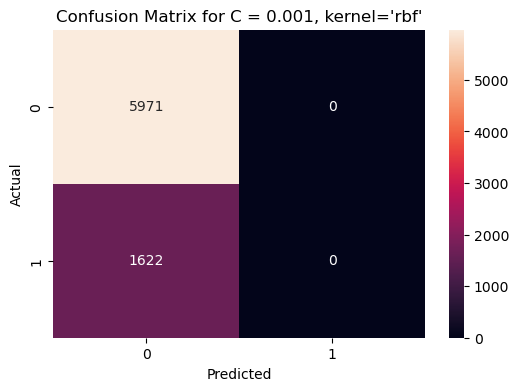

Accuracy of C = 0.01, kernel='rbf': 80.19%
Recall: 0.07, F1 Score: 0.14


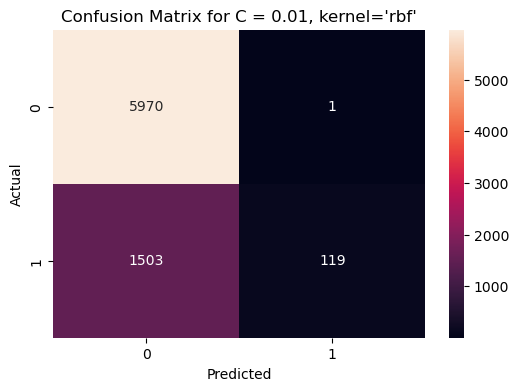

Accuracy of C = 0.1, kernel='rbf': 85.70%
Recall: 0.38, F1 Score: 0.53


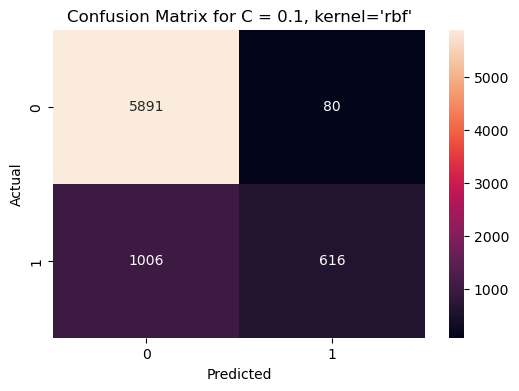

Accuracy of C = 1, kernel='rbf': 85.82%
Recall: 0.39, F1 Score: 0.54


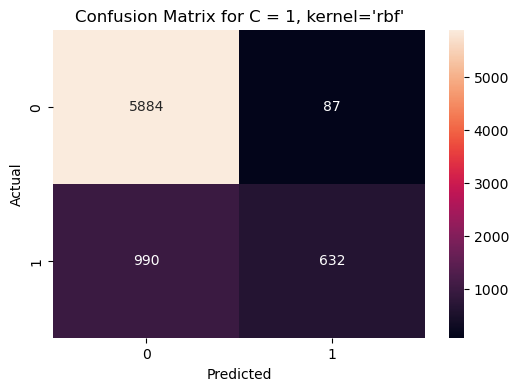

Accuracy of C = 10, kernel='rbf': 86.18%
Recall: 0.41, F1 Score: 0.56


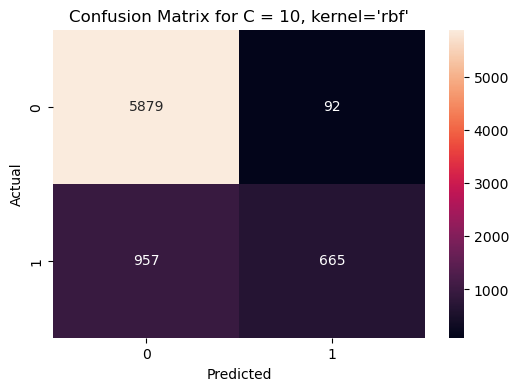

Accuracy of C = 100, kernel='rbf': 87.38%
Recall: 0.46, F1 Score: 0.61


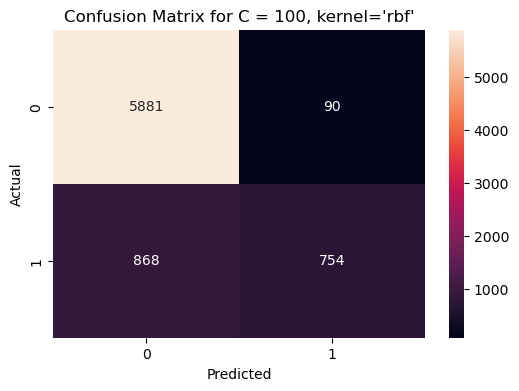

Accuracy of C = 1000, kernel='rbf': 88.56%
Recall: 0.52, F1 Score: 0.66


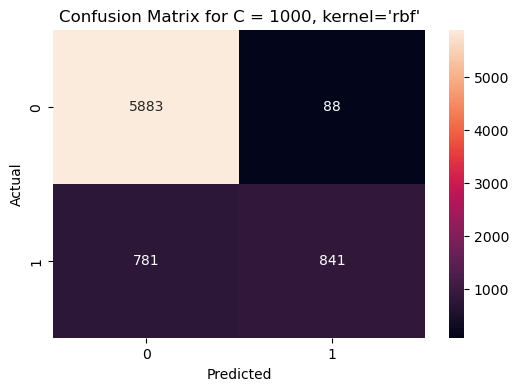

In [10]:
# 忽略： FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# 获取数据
X = data_B_all_df[['smart_9_normalized', 'smart_191_normalized', 'smart_192raw', 'smart_195_normalized', 'smart_5raw', 'smart_199raw', 'smart_190_normalized', 'smart_188raw', 'smart_194_normalized', 'smart_194raw', 'smart_190raw' , 'smart_191raw', 'smart_7_normalized', 'smart_9raw', 'smart_7raw', 'smart_242raw', 'smart_241raw']]
y = data_B_all_df['target'] 

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 用每列的平均值填充NaN
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# 替换无穷大为有限的大数
X_train.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)

# 定义模型
models_SVC_1 = {
    "C = 0.001, kernel='rbf'": SVC(C=0.001, kernel='rbf'),
    "C = 0.01, kernel='rbf'": SVC(C=0.01, kernel='rbf'),
    "C = 0.1, kernel='rbf'": SVC(C=0.1, kernel='rbf'),
    "C = 1, kernel='rbf'": SVC(C=1, kernel='rbf'),
    "C = 10, kernel='rbf'": SVC(C=10, kernel='rbf'),
    "C = 100, kernel='rbf'": SVC(C=100, kernel='rbf'),
    "C = 1000, kernel='rbf'": SVC(C=1000, kernel='rbf'),
}

# 训练模型，并评估精度
for name, model in models_SVC_1.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    print(f"Accuracy of {name}: {accuracy * 100:.2f}%")
    print(f"Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    plot_confusion_matrix(conf_matrix, class_names=['0', '1'], model_name=name)  # Assuming binary classification

In [11]:
# 忽略： FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# 获取数据
X = data_B_all_df[['smart_9_normalized', 'smart_191_normalized', 'smart_192raw', 'smart_195_normalized', 'smart_5raw', 'smart_199raw', 'smart_190_normalized', 'smart_188raw', 'smart_194_normalized', 'smart_194raw', 'smart_190raw' , 'smart_191raw', 'smart_7_normalized', 'smart_9raw', 'smart_7raw', 'smart_242raw', 'smart_241raw']]
y = data_B_all_df['target'] 

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 用每列的平均值填充NaN
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# 替换无穷大为有限的大数
X_train.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)

# 定义模型
models_SVC_2 = {
    "C = 1000, kernel='rbf'": SVC(C=1000, kernel='rbf'),
    "C = 1000, kernel='sigmoid'": SVC(C=1000, kernel='sigmoid'),
}

# 训练模型，并评估精度
for name, model in models_SVC_2.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy of {name}: {accuracy * 100:.2f}%")

Accuracy of C = 1000, kernel='rbf': 88.56%
Accuracy of C = 1000, kernel='sigmoid': 70.55%


##### 训练模型（逻辑回归B模型、决策树B模型、随机森林B模型、支持向量机B模型、K最近相邻B模型）

In [12]:
def plot_confusion_matrix(conf_matrix, class_names, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Accuracy of Logistic Regression: 86.07%
Recall: 0.39, F1 Score: 0.55


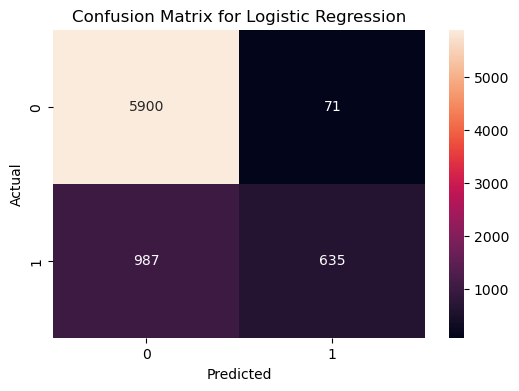

Accuracy of Decision Tree: 87.88%
Recall: 0.65, F1 Score: 0.70


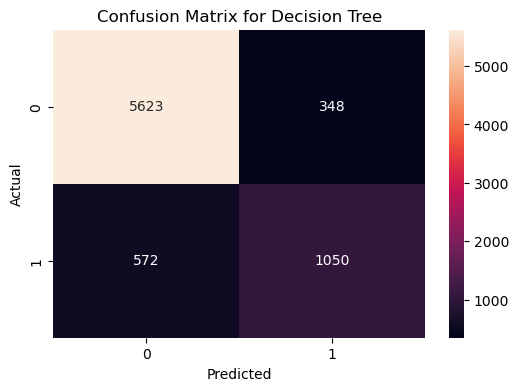

Accuracy of Random Forest: 91.36%
Recall: 0.63, F1 Score: 0.76


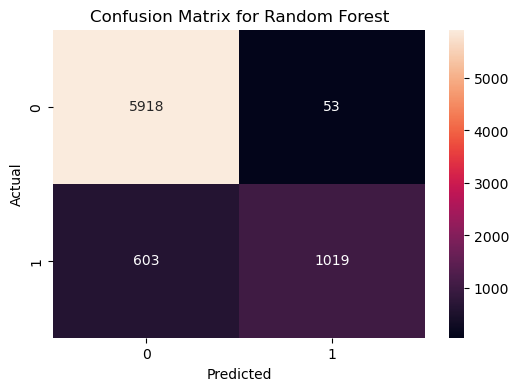

Accuracy of Support Vector Machine: 88.56%
Recall: 0.52, F1 Score: 0.66


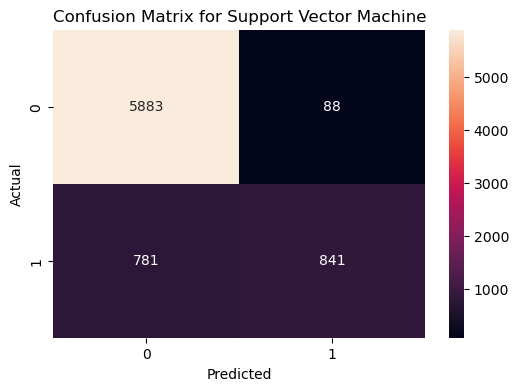

Accuracy of K-Nearest Neighbors: 99.63%
Recall: 0.99, F1 Score: 0.99


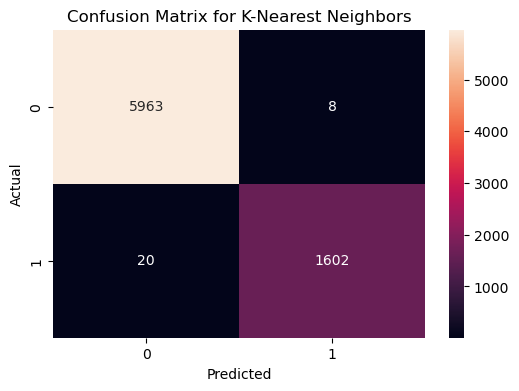

In [13]:
# 忽略： FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
# 获取数据
X = data_B_all_df[['smart_9_normalized', 'smart_191_normalized', 'smart_192raw', 'smart_195_normalized', 'smart_5raw', 'smart_199raw', 'smart_190_normalized', 'smart_188raw', 'smart_194_normalized', 'smart_194raw', 'smart_190raw' , 'smart_191raw', 'smart_7_normalized', 'smart_9raw', 'smart_7raw', 'smart_242raw', 'smart_241raw']]
y = data_B_all_df['target'] 

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 用每列的平均值填充NaN
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# 替换无穷大为有限的大数
X_train.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)
X_test.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)
# 定义模型
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=0.001),
    "Decision Tree": DecisionTreeClassifier(max_depth=13, min_samples_split=0.1),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_features='log2', max_depth=8, criterion='entropy'),
    "Support Vector Machine": SVC(C=1000, kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=1, weights='distance')

}
# 训练模型，并评估精度
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    print(f"Accuracy of {name}: {accuracy * 100:.2f}%")
    print(f"Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    plot_confusion_matrix(conf_matrix, class_names=['0', '1'], model_name=name)  # Assuming binary classification

##### 检查B模型是否过拟合或欠拟合（逻辑回归B模型、决策树B模型、随机森林B模型、支持向量机B模型、K最近相邻B模型）

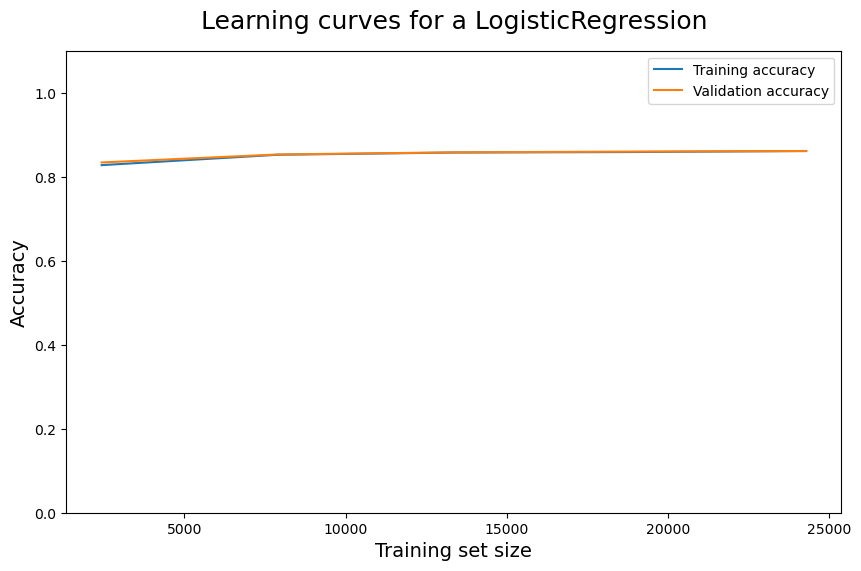

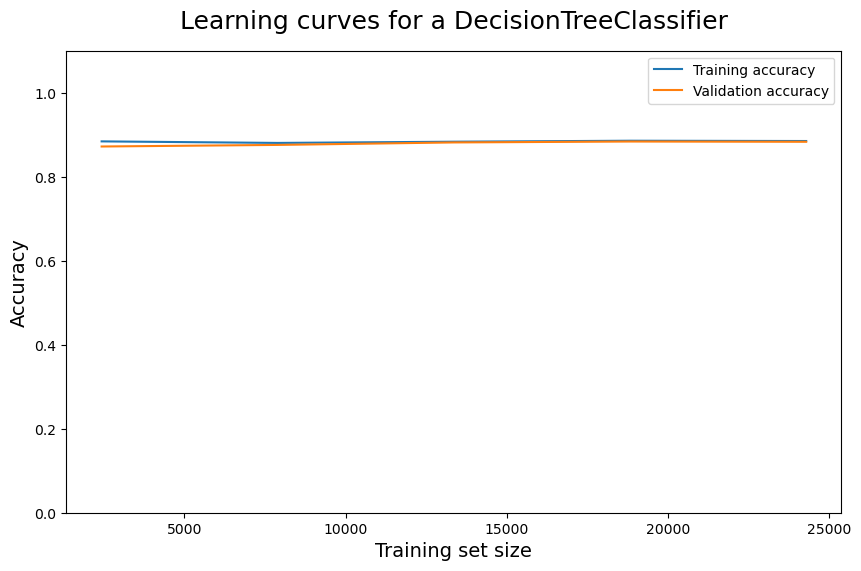

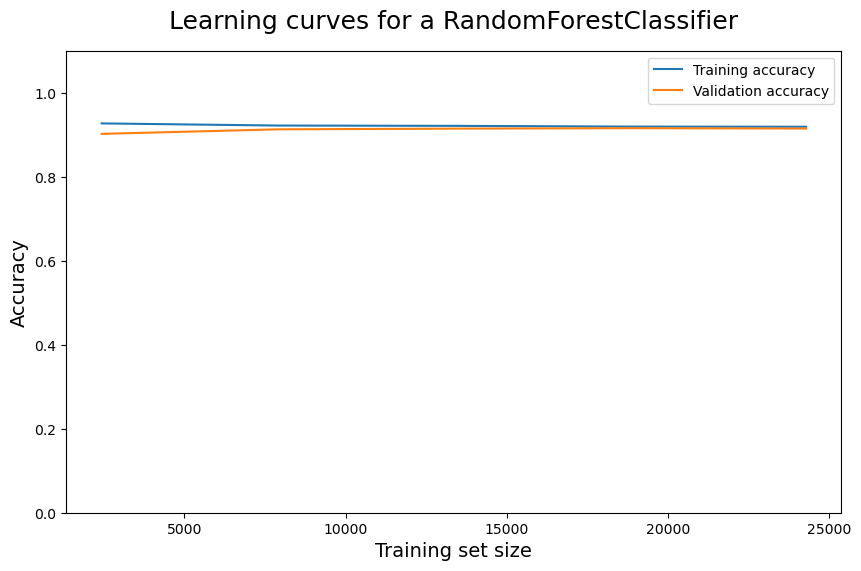

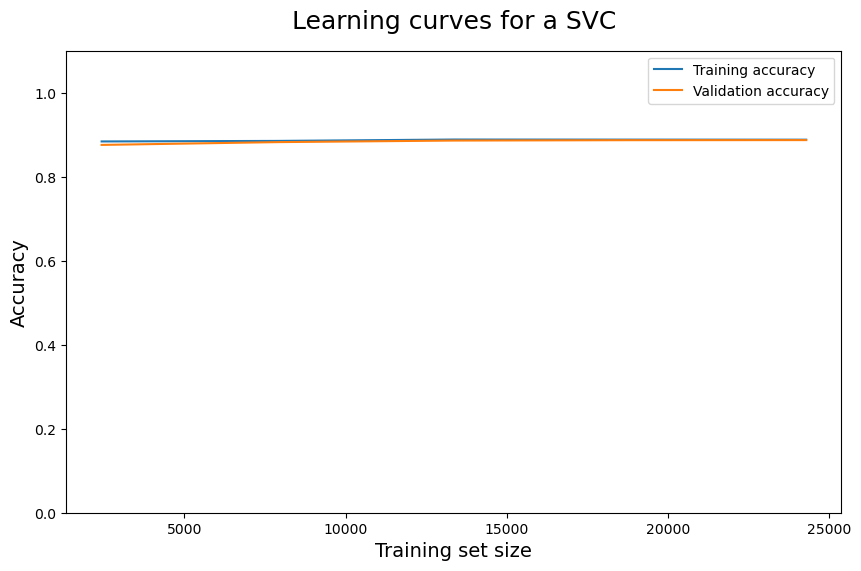

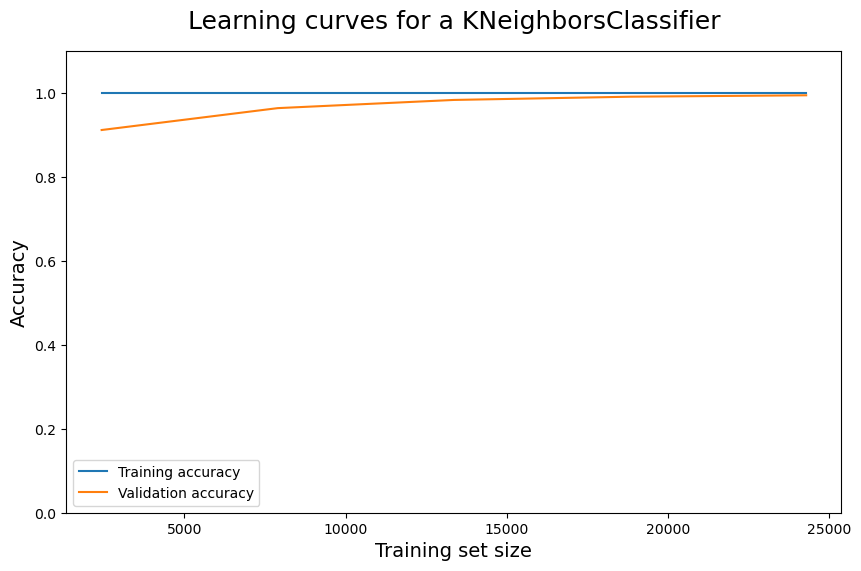

In [14]:
# 定义一个函数来绘制学习曲线
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(estimator=model, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='accuracy')

    train_scores_mean = train_scores.mean(axis=1)
    validation_scores_mean = validation_scores.mean(axis=1)

    plt.plot(train_sizes, train_scores_mean, label='Training accuracy')
    plt.plot(train_sizes, validation_scores_mean, label='Validation accuracy')
    

    plt.ylabel('Accuracy', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.title('Learning curves for a ' + str(model.__class__.__name__), fontsize=18, y=1.03)
    plt.legend()
    plt.ylim(0,1.1)

# 对每个模型绘制学习曲线
for name, model in models.items():
    plt.figure(figsize=(10, 6))
    plot_learning_curve(model, X_train, y_train)
    plt.show()

[0]	eval-logloss:0.20445	train-logloss:0.18151
[1]	eval-logloss:0.10418	train-logloss:0.07504
[2]	eval-logloss:0.06387	train-logloss:0.03700
[3]	eval-logloss:0.04702	train-logloss:0.02184
[4]	eval-logloss:0.03773	train-logloss:0.01415
[5]	eval-logloss:0.03297	train-logloss:0.01044
[6]	eval-logloss:0.02896	train-logloss:0.00803
[7]	eval-logloss:0.02652	train-logloss:0.00665
[8]	eval-logloss:0.02474	train-logloss:0.00581
[9]	eval-logloss:0.02336	train-logloss:0.00520
[10]	eval-logloss:0.02241	train-logloss:0.00451
[11]	eval-logloss:0.02122	train-logloss:0.00414
[12]	eval-logloss:0.02083	train-logloss:0.00373
[13]	eval-logloss:0.02046	train-logloss:0.00348
[14]	eval-logloss:0.01971	train-logloss:0.00320
[15]	eval-logloss:0.01936	train-logloss:0.00295
[16]	eval-logloss:0.01872	train-logloss:0.00273
[17]	eval-logloss:0.01814	train-logloss:0.00256
[18]	eval-logloss:0.01778	train-logloss:0.00241
[19]	eval-logloss:0.01732	train-logloss:0.00228
[20]	eval-logloss:0.01691	train-logloss:0.00217
[2

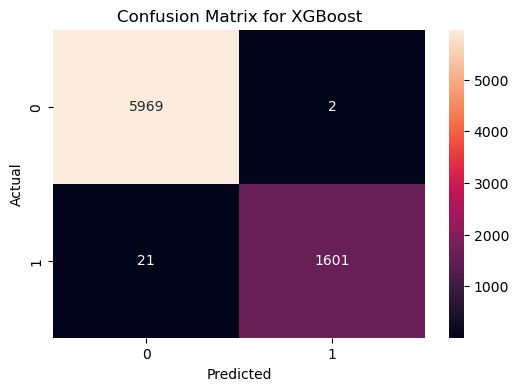

In [19]:
# B类型数据的训练(XGBoost)
X = data_B_all_df[['smart_9_normalized', 'smart_191_normalized', 'smart_192raw', 'smart_195_normalized', 'smart_5raw', 'smart_199raw', 'smart_190_normalized', 'smart_188raw', 'smart_194_normalized', 'smart_194raw', 'smart_190raw' , 'smart_191raw', 'smart_7_normalized', 'smart_9raw', 'smart_7raw', 'smart_242raw', 'smart_241raw']]
y = data_B_all_df['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 转换为DMatrix数据格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 设置参数
param = {
    'max_depth': 18,  # 树的最大深度
    'eta': 1,  # 学习率
    'objective': 'binary:logistic',  # 二分类的逻辑回归，返回预测的概率(不是类别)
    'nthread': 4,  # XGBoost运行时的线程数
    'eval_metric': 'logloss'  # 在验证数据上，所用评价指标
}

evallist = [(dtest, 'eval'), (dtrain, 'train')]  # 用于观察模型在训练和测试集上的效果，可以为空

n_estimators = 500  # 基学习器的个数，即树的个数

# 初始化一个空词典用于保存评估指标
eval_result = {}

bst = xgb.train(param, dtrain, n_estimators, evals=evallist, evals_result=eval_result)

# 保存每个epoch的评估指标
train_errors = eval_result['train']['logloss']
eval_errors = eval_result['eval']['logloss']

# 预测
preds = bst.predict(dtest)
# XGBoost预测的是概率，需要转化为类别
preds = [1 if i > 0.5 else 0 for i in preds]

# 计算准确度
accuracy = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
conf_matrix = confusion_matrix(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
plot_confusion_matrix(conf_matrix, class_names=['0', '1'], model_name='XGBoost')
bst.save_model('xgboost_model2.model')

##### 检查A模型是否过拟合或欠拟合（XGBoostB模型）

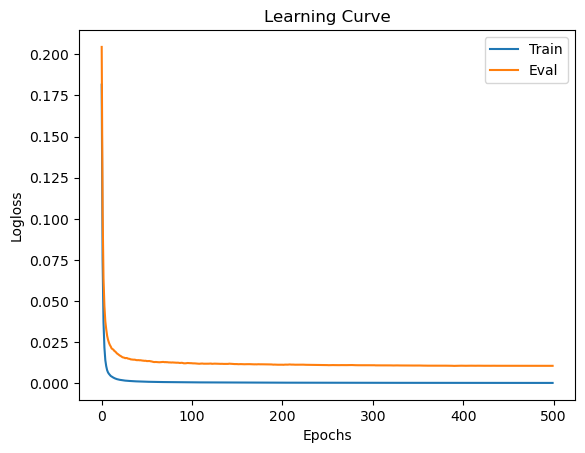

In [18]:
plt.figure()
plt.plot(train_errors, label='Train')
plt.plot(eval_errors, label='Eval')
plt.xlabel('Epochs')
plt.ylabel('Logloss')
plt.title('Learning Curve')
plt.legend()
plt.show()